Lakshmi Bhramara Mutte

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("laptop_data.csv")

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.shape

(1303, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

###### Pre-Processing and Exploratory Data Analysis 

Column 'Unnamed:0' is unnecessary hence dropping the column

In [10]:
df.drop(columns='Unnamed: 0',inplace=True)

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


###### Removing the term GB from Ram and kg from Weight since these terms are unnecessary

In [12]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [13]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


###### Ram, Weight is of int, float datatypes respectively. But in the dataset they are of object datatype hence converting them to int, float datatypes.

In [14]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Bhramara Mutte\AppData\Local\Temp\ipykernel_12140\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

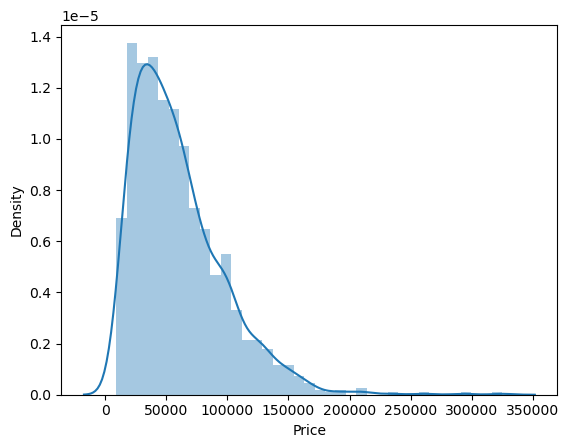

In [17]:
sns.distplot(df['Price'])

From the above plot, we can observe the data is skewed i.e there are more laptops whose price is less and there are only few laptops whose price is higher.

<Axes: >

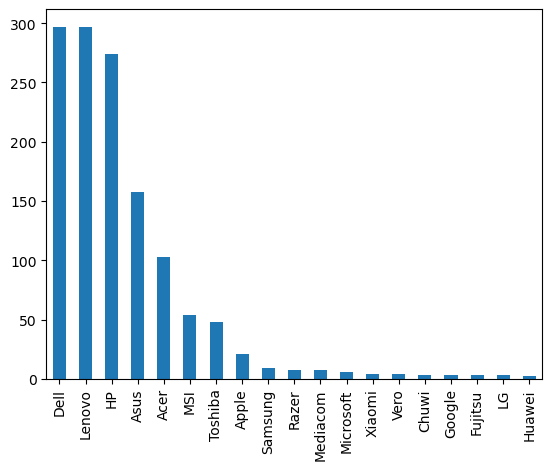

In [18]:
df['Company'].value_counts().plot(kind='bar')

There are equal number of Dell and Lenovo Company Laptops.

Finding average price for each brand

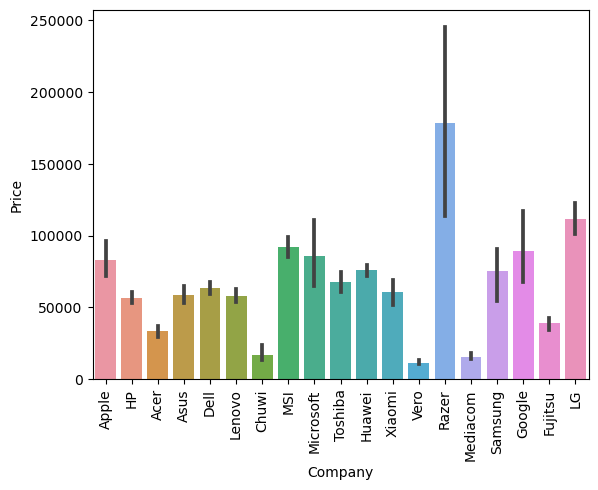

In [19]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

There is a variation in the price of the laptop depending on the company.

Finding the number of types of laptops and their count

<Axes: >

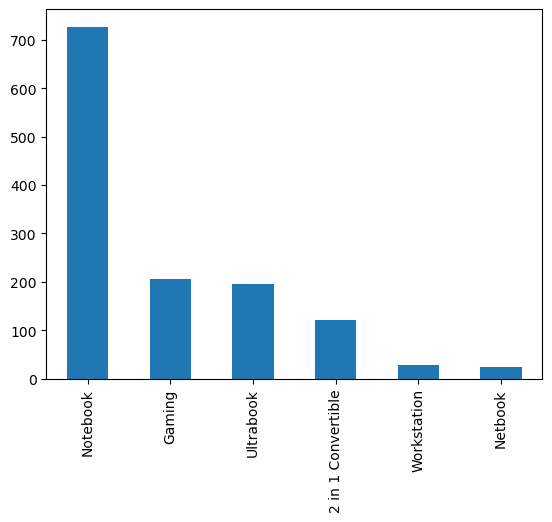

In [20]:
df['TypeName'].value_counts().plot(kind='bar')

Finding average price for each type. 

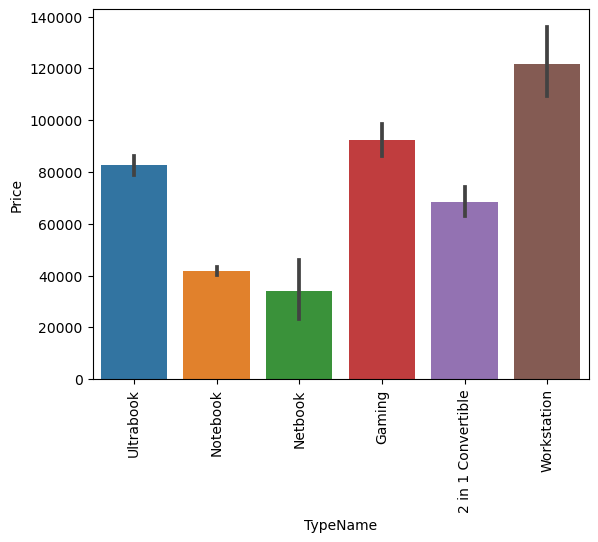

In [21]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Workstation laptops are high priced , then Gaming and then Ultrabook

C:\Users\Bhramara Mutte\AppData\Local\Temp\ipykernel_12140\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

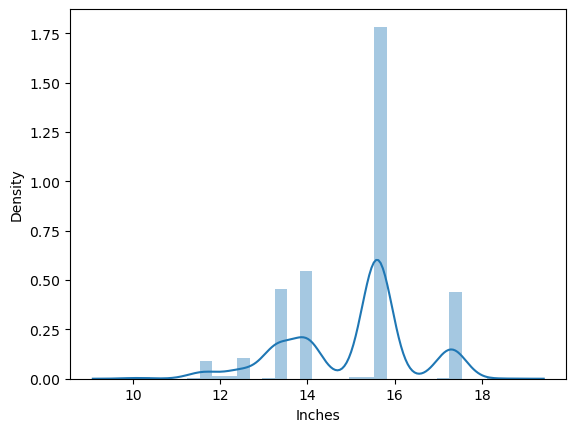

In [22]:
sns.distplot(df['Inches'])

Most of the laptops fall under 15.6 inches category

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


The column ScreenResolution is completely in mixed format.So, there is a need to perform Feature Engineering. Creating a new column based on TouchScreen and merging it.

In [24]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [25]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: >

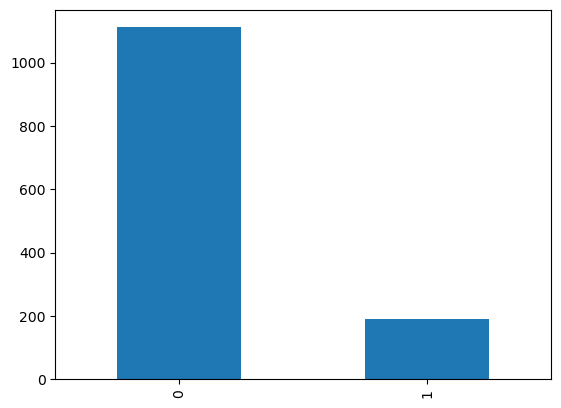

In [27]:
df['TouchScreen'].value_counts().plot(kind='bar')

Most of the laptops are non Touchscreen laptops.

<Axes: xlabel='TouchScreen', ylabel='Price'>

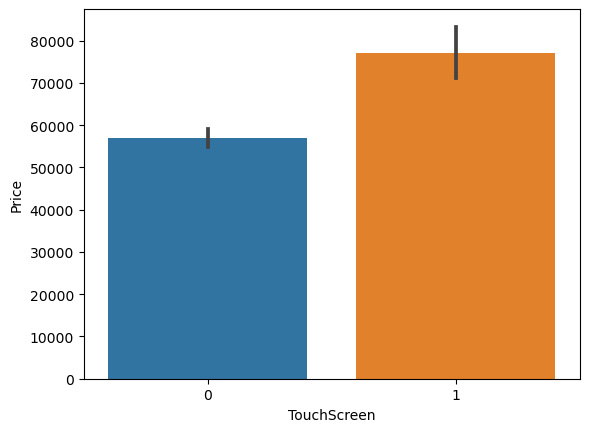

In [28]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

On an average, the price of TouchScreen laptops is higher than Non-TouchScreen laptops.

Creating a new column based on IPS and merge it to the dataframe




In [29]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: >

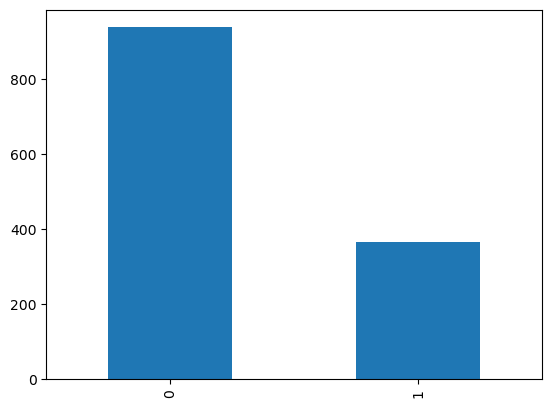

In [31]:
df['IPS'].value_counts().plot(kind='bar')

Most of the laptops do not have IPS display.

<Axes: xlabel='IPS', ylabel='Price'>

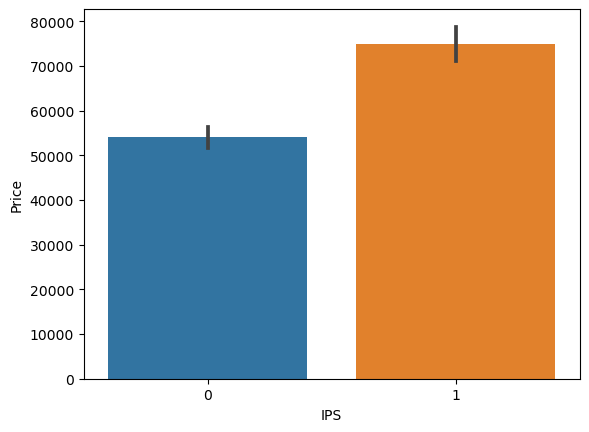

In [32]:
sns.barplot(x=df['IPS'],y=df['Price'])

On an average, the price of laptops with IPS display is higher than laptops without IPS display.

Splitting the Screen Resolution as x-resolution and y-resolution

In [33]:
data=df['ScreenResolution'].str.split(' ').apply(lambda x:x[-1])


In [34]:
df['X_res']=data.str.split('x',n=1,expand=True)[0]
df['Y_res']=data.str.split('x',n=1,expand=True)[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


The datatype of X_res,Y_res columns is object. Converting datatype to int

In [37]:
df['X_res']=df['X_res'].astype('int32')
df['Y_res']=df['Y_res'].astype('int32')

Finding correaltion with respect to price

In [38]:
df.corr(method='pearson',numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

There is a strong correlation with Ram, X_res, Y_res.

Instead of using 3 columns: Inches, X_res, Y_res, we can simply rely on one feature which is PPI(Pixels per Inch) that can be calculated using Inches, X_res, Y_res. 

PPI=sqrt((X_res)^2+(Y_res)^2)/Inches

In [39]:
df['PPI']=(((df['X_res']**2)+(df['Y_res']**2))**0.05/df['Inches']).astype('float')

In [40]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,0.167546
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,0.158178
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,0.138412
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,0.146413
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,0.167546


We can drop Inches, X_res, Y_res since we have PPI.

Dropping ScreenResolution column as all the information has been properly converted.

In [41]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

Wroking with CPU column

In [42]:
df['Cpu'].nunique()

118

There are too many categories ..Cutting down the Categories to 5: Intel i5,Intel i7,Intel i3, Intel -Others, AMD.

Firstly, get the first 3 words of CPU column

In [43]:
df['CPU Name']=df['Cpu'].apply(lambda x:x.split(' ')[0:3])

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,"[Intel, Core, i5]"


In [45]:
def proc(l):
    if l[2]=='i5' or l[2]=='i7' or l[2]=='i3':
        return l[0]+' '+l[1]+' '+l[2]
    else:
        if l[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'  

In [46]:
df['Processor']=df['CPU Name'].apply(proc)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU Name,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,"[Intel, Core, i5]",Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,"[Intel, Core, i5]",Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,"[Intel, Core, i5]",Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,"[Intel, Core, i7]",Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,"[Intel, Core, i5]",Intel Core i5


Converting list to string

In [48]:
df['Processor']=df['Processor'].apply(lambda x:"".join(x))

In [49]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU Name,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,"[Intel, Core, i5]",Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,"[Intel, Core, i5]",Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,"[Intel, Core, i5]",Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,"[Intel, Core, i7]",Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,"[Intel, Core, i5]",Intel Core i5


In [50]:
df.drop(columns='CPU Name',axis=1,inplace=True)

Extracting clockspeed from Cpu column

In [51]:
df['clockspeed']=df['Cpu'].str.split(' ').apply(lambda x:x[-1])

In [52]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,clockspeed
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,Intel Core i5,2.3GHz
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,Intel Core i5,1.8GHz
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,Intel Core i5,2.5GHz
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,Intel Core i7,2.7GHz
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,Intel Core i5,3.1GHz


In [53]:
df['clockspeed']=df['clockspeed'].str.replace('GHz','')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   TouchScreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  PPI          1303 non-null   float64
 12  Processor    1303 non-null   object 
 13  clockspeed   1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 132.5+ KB


In [55]:
df['clockspeed']=df['clockspeed'].astype('float')

In [56]:
df.drop(columns='Cpu',axis=1,inplace=True)

<Axes: >

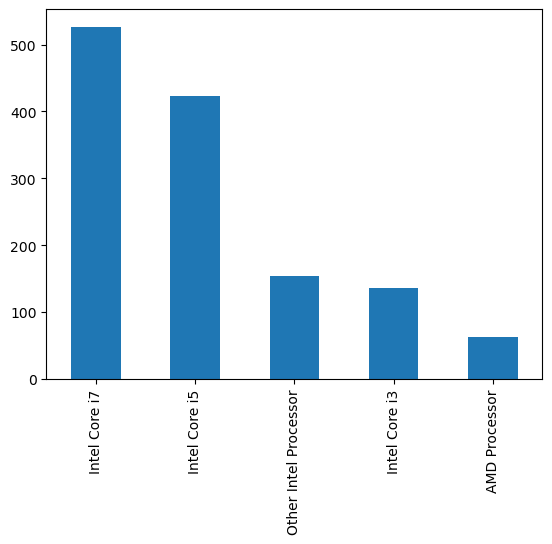

In [57]:
df['Processor'].value_counts().plot(kind='bar')

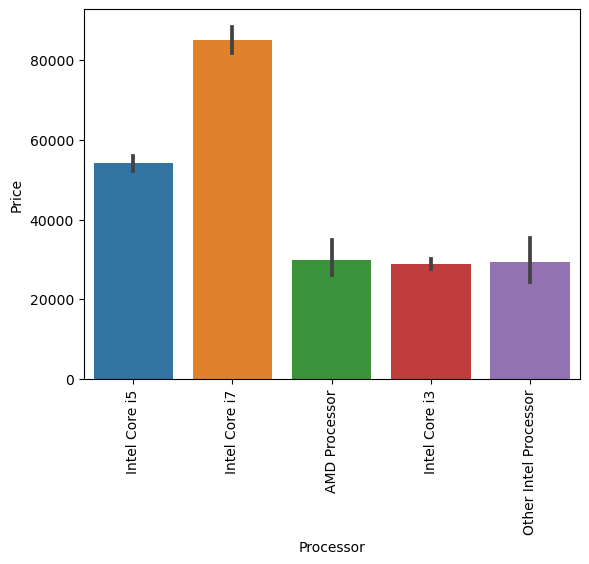

In [58]:
sns.barplot(x=df['Processor'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Laptops with Intel i7 processor are high priced

In [59]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,clockspeed
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,Intel Core i5,3.1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Weight       1303 non-null   float32
 7   Price        1303 non-null   float64
 8   TouchScreen  1303 non-null   int64  
 9   IPS          1303 non-null   int64  
 10  PPI          1303 non-null   float64
 11  Processor    1303 non-null   object 
 12  clockspeed   1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(2), object(6)
memory usage: 122.3+ KB


Converting Memory column into usable format

In [61]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [62]:
df['Memory_amount']=df['Memory'].str.split(" ").apply(lambda x:x[0])
df['Memory_type']=df['Memory'].str.split(" ").apply(lambda x:x[1])

In [63]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,clockspeed,Memory_amount,Memory_type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,Intel Core i5,2.3,128GB,SSD
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,Intel Core i5,1.8,128GB,Flash
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,Intel Core i5,2.5,256GB,SSD
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,Intel Core i7,2.7,512GB,SSD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,Intel Core i5,3.1,256GB,SSD


In [64]:
df['Memory_type'].nunique()

4

In [65]:
def turn(value):
    if "GB" in value:
        return float(value[:value.find("GB")])
    elif "TB" in value:
        return float(value[:value.find("TB")])*1000

In [66]:
df['Memory_amount']=df['Memory_amount'].apply(lambda x:turn(x))

In [67]:
df['Memory_amount']=df['Memory_amount'].astype(int)

In [68]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,clockspeed,Memory_amount,Memory_type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,0.167546,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,0.158178,Intel Core i5,1.8,128,Flash
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,0.138412,Intel Core i5,2.5,256,SSD
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,0.146413,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,0.167546,Intel Core i5,3.1,256,SSD


In [69]:
df.drop(columns='Memory',axis=1,inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Gpu            1303 non-null   object 
 4   OpSys          1303 non-null   object 
 5   Weight         1303 non-null   float32
 6   Price          1303 non-null   float64
 7   TouchScreen    1303 non-null   int64  
 8   IPS            1303 non-null   int64  
 9   PPI            1303 non-null   float64
 10  Processor      1303 non-null   object 
 11  clockspeed     1303 non-null   float64
 12  Memory_amount  1303 non-null   int32  
 13  Memory_type    1303 non-null   object 
dtypes: float32(1), float64(3), int32(2), int64(2), object(6)
memory usage: 127.4+ KB


Transforming GPU column

In [71]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

There are many categories but for simplicity cutting them to Brand Categories

In [72]:
df['Gpu']=df['Gpu'].apply(lambda x:x.split(' ')[0])

In [73]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu, dtype: int64

Since there is only one laptop having Gpu=ARM, dropping that laptop record

In [74]:
df=df[df['Gpu']!='ARM']

In [75]:
df['Gpu'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu, dtype: int64

Converting OpSys column into required form

In [76]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

How price varies with Operating System type

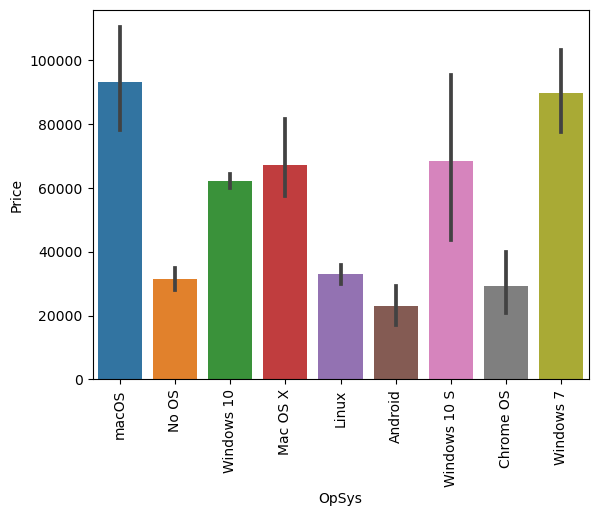

In [77]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Cutting down to 5 categories: Windows, Mac OS, Linux, Chrome, Others

In [78]:
def cut(val):
    if val=="Windows 10" or val=="Windows 10 S" or val=="Windows 7":
        return 'Windows'
    elif val=='macOS' or val=='Mac OS X':
        return 'Mac OS'
    elif val=='Linux':
        return 'Linux'
    elif val=='Chrome OS':
        return "Chrome OS"
    else: return 'Other'

In [79]:
df['OpSys']=df['OpSys'].apply(lambda x:cut(x))

In [80]:
df['OpSys'].value_counts()

Windows      1125
Other          68
Linux          62
Chrome OS      26
Mac OS         21
Name: OpSys, dtype: int64

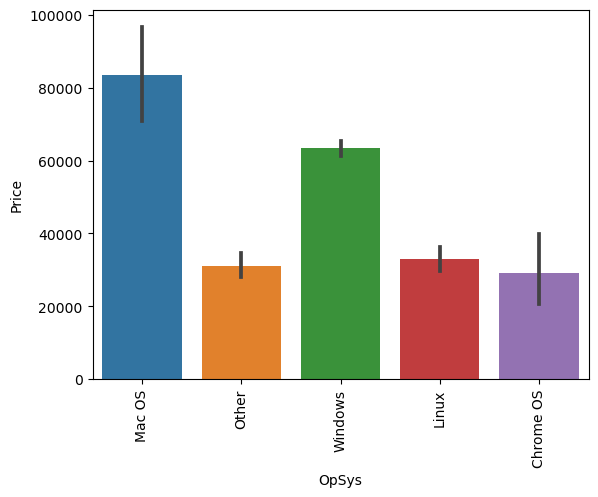

In [81]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

On an average, Macbooks are high priced.

This is the resulting dataframe

In [82]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,clockspeed,Memory_amount,Memory_type
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,71378.6832,0,1,0.167546,Intel Core i5,2.3,128,SSD
1,Apple,Ultrabook,8,Intel,Mac OS,1.34,47895.5232,0,0,0.158178,Intel Core i5,1.8,128,Flash
2,HP,Notebook,8,Intel,Other,1.86,30636.0000,0,0,0.138412,Intel Core i5,2.5,256,SSD
3,Apple,Ultrabook,16,AMD,Mac OS,1.83,135195.3360,0,1,0.146413,Intel Core i7,2.7,512,SSD
4,Apple,Ultrabook,8,Intel,Mac OS,1.37,96095.8080,0,1,0.167546,Intel Core i5,3.1,256,SSD


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Gpu            1302 non-null   object 
 4   OpSys          1302 non-null   object 
 5   Weight         1302 non-null   float32
 6   Price          1302 non-null   float64
 7   TouchScreen    1302 non-null   int64  
 8   IPS            1302 non-null   int64  
 9   PPI            1302 non-null   float64
 10  Processor      1302 non-null   object 
 11  clockspeed     1302 non-null   float64
 12  Memory_amount  1302 non-null   int32  
 13  Memory_type    1302 non-null   object 
dtypes: float32(1), float64(3), int32(2), int64(2), object(6)
memory usage: 137.3+ KB


<Axes: >

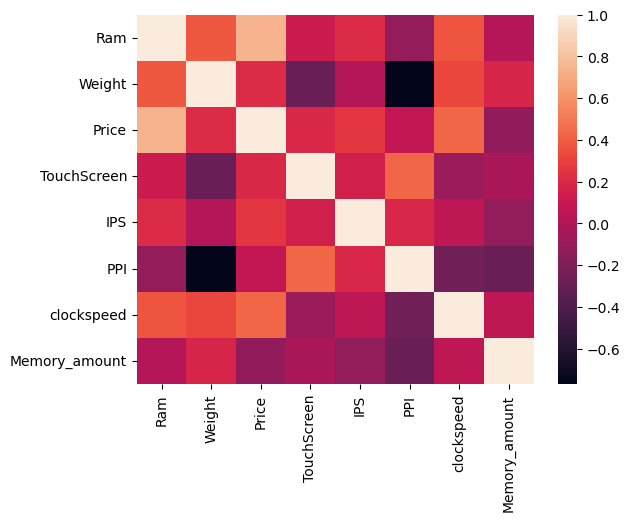

In [84]:
sns.heatmap(df.corr(numeric_only=True))

The target column 'Price' is skewed. Transforming it using 'log transformation' method

C:\Users\Bhramara Mutte\AppData\Local\Temp\ipykernel_12140\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

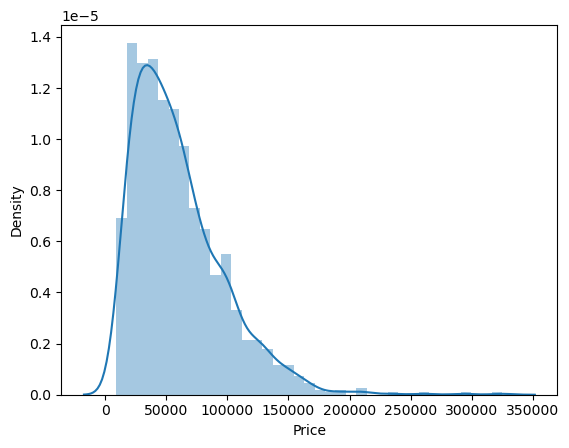

In [85]:
sns.distplot(df['Price'])

C:\Users\Bhramara Mutte\AppData\Local\Temp\ipykernel_12140\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

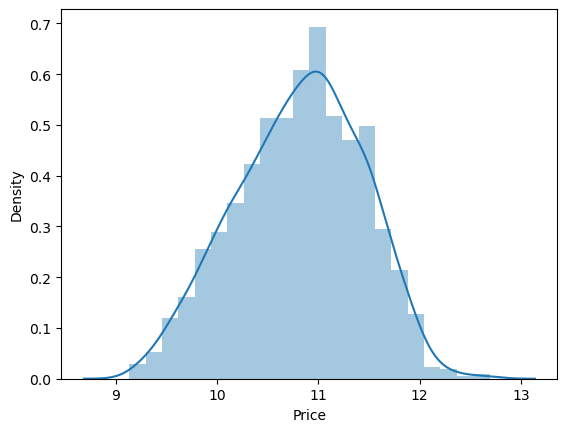

In [86]:
sns.distplot(np.log(df['Price']))

Splitting the data

In [87]:
X=df.drop(columns='Price',axis=1)
Y=np.log(df['Price'])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

Fitting the model

Creating a pipeline for easy flow of the model.
ColumnTransformer allows to transform individual or subset of columns.

In [90]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import  Pipeline,make_pipeline

Machine learning models mostly prefer Numerical columns. Hence OneHotEncoder transforms nominal categorical data into binary data.
All the categorical features in the dataset arenominal categorical data.

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [92]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,clockspeed,Memory_amount,Memory_type
0,Apple,Ultrabook,8,Intel,Mac OS,1.37,71378.6832,0,1,0.167546,Intel Core i5,2.3,128,SSD


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

drop='first'   to tackle multi collinearity

In [94]:
step1=ColumnTransformer(transformers=[('trans',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,3,4,9,12])],remainder='passthrough')

step2=ColumnTransformer(transformers=[('scale',StandardScaler(),[2,5,6,7,8,10,11])],remainder='passthrough')

step3=LinearRegression()

pipe=Pipeline([('step1',step1),('step2',step2),('step3',step3)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score for Linear Regression:",r2_score(y_test,y_pred))


R2 score for Linear Regression: 0.7927861487833623


In [95]:

step1=ColumnTransformer(transformers=[('trans',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,3,4,9,12])],remainder='passthrough')

step2=ColumnTransformer(transformers=[('scale',StandardScaler(),[2,5,6,7,8,10,11])],remainder='passthrough')

step3=DecisionTreeRegressor(max_depth=10)

pipe=Pipeline([('step1',step1),('step2',step2),('step3',step3)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score for Decision Tree Regression:",r2_score(y_test,y_pred))

R2 score for Decision Tree Regression: 0.8137751912687103


In [96]:
step1=ColumnTransformer(transformers=[('trans',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[0,1,3,4,9,12])],remainder='passthrough')

step2=ColumnTransformer(transformers=[('scale',StandardScaler(),[2,5,6,7,8,10,11])],remainder='passthrough')

step3=RandomForestRegressor()

pipe=Pipeline([('step1',step1),('step2',step2),('step3',step3)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)


print("R2 score for Random Forest Regression:",r2_score(y_test,y_pred))

R2 score for Random Forest Regression: 0.8658394747681053


Among three models, Random Forest Regression has highest R2 score, hence we will use this model as the final model

In [97]:
ohe=OneHotEncoder()
ohe.fit(X[['Company','TypeName','Gpu','OpSys','Processor','Memory_type']])

OneHotEncoder()

In [98]:
ohe.categories_

[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
        'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
        'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
 array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array(['AMD', 'Intel', 'Nvidia'], dtype=object),
 array(['Chrome OS', 'Linux', 'Mac OS', 'Other', 'Windows'], dtype=object),
 array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
        'Other Intel Processor'], dtype=object),
 array(['Flash', 'HDD', 'Hybrid', 'SSD'], dtype=object)]

In [99]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_,handle_unknown='ignore'),[0,1,3,4,9,12]),remainder='passthrough')

In [100]:
scale=make_column_transformer((StandardScaler(with_mean=False),[2,5,6,7,8,10,11]),remainder='passthrough')

In [101]:
rf=RandomForestRegressor()

In [102]:
pipe_m=make_pipeline(column_trans,scale,rf)

In [103]:
pipe_m.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming'...
                                                                            array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
       'Other Intel Processor'], dtype=object),
                                                                            array(['Flash', 'HDD', 'Hybrid', 'SSD'], dtype=object)],
                                                                handle_unknown='ignore'),
                                                  [0, 1, 3, 4, 9, 12])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(with_mean=False),
                                                  [2, 5, 6, 7, 8, 10, 11])])),
                ('randomforestregressor', RandomForestRegressor())])

In [104]:
y_pred=pipe_m.predict(x_test)

In [105]:
print(r2_score(y_test,y_pred))


0.8697135536306861


Exporting the model using pickle

In [106]:
import pickle
pickle.dump(pipe_m,open('model.pkl','wb'))